In [1]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create spark session

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

22/04/10 21:43:19 WARN Utils: Your hostname, Tanishqs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.29.164 instead (on interface en0)
22/04/10 21:43:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/10 21:43:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Import data types

from pyspark.sql.types import *

sc = spark.sparkContext

# DATA EXPLORATION

# Event Data

In [4]:
# Read the events data

eventsDf = spark.read.options(header="true",\
                              inferSchema="true",\
                              nullValue="NA",\
                              mode="failfast")\
                             .csv("events.csv")

In [5]:
# Data specs

print('Data is having', eventsDf.count(), "rows and", len(eventsDf.columns), 'columns' )

Data is having 941009 rows and 22 columns


In [6]:
# Data Schema

eventsDf.printSchema()

root
 |-- id_odsp: string (nullable = true)
 |-- id_event: string (nullable = true)
 |-- sort_order: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- event_type2: integer (nullable = true)
 |-- side: integer (nullable = true)
 |-- event_team: string (nullable = true)
 |-- opponent: string (nullable = true)
 |-- player: string (nullable = true)
 |-- player2: string (nullable = true)
 |-- player_in: string (nullable = true)
 |-- player_out: string (nullable = true)
 |-- shot_place: integer (nullable = true)
 |-- shot_outcome: integer (nullable = true)
 |-- is_goal: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- bodypart: integer (nullable = true)
 |-- assist_method: integer (nullable = true)
 |-- situation: integer (nullable = true)
 |-- fast_break: integer (nullable = true)



In [7]:
# Get Partitions

eventsDf.rdd.getNumPartitions()

8

In [8]:
# Show sample data

eventsDf.show(2)

+---------+---------+----------+----+--------------------+----------+-----------+----+-----------------+-----------------+----------------+----------------+---------+----------+----------+------------+-------+--------+--------+-------------+---------+----------+
|  id_odsp| id_event|sort_order|time|                text|event_type|event_type2|side|       event_team|         opponent|          player|         player2|player_in|player_out|shot_place|shot_outcome|is_goal|location|bodypart|assist_method|situation|fast_break|
+---------+---------+----------+----+--------------------+----------+-----------+----+-----------------+-----------------+----------------+----------------+---------+----------+----------+------------+-------+--------+--------+-------------+---------+----------+
|UFot0hit/|UFot0hit1|         1|   2|Attempt missed. M...|         1|         12|   2|       Hamburg SV|Borussia Dortmund|   mladen petric|     gokhan tore|     null|      null|         6|           2|      0|  

In [9]:
# Checking if null values are present in variable of interest

from pyspark.sql.functions import isnan, when, count, col

tempDF = eventsDf[['player', 'event_team', 'opponent', 'event_type', 'event_type2', 'shot_place', 'shot_outcome', 'location', 'bodypart', 'assist_method', 'situation']]
tempDF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in tempDF.columns]).show()

+------+----------+--------+----------+-----------+----------+------------+--------+--------+-------------+---------+
|player|event_team|opponent|event_type|event_type2|shot_place|shot_outcome|location|bodypart|assist_method|situation|
+------+----------+--------+----------+-----------+----------+------------+--------+--------+-------------+---------+
| 60736|         0|       0|         0|     726716|    713550|      712511|  473942|  711824|            0|   711872|
+------+----------+--------+----------+-----------+----------+------------+--------+--------+-------------+---------+



In [10]:
# Handling Null Values

eventsDf = eventsDf.na.fill({'player': 'NA', 'event_team': 'NA', 'opponent': 'NA', 
                             'event_type': 'NA', 'event_type2': 'NA', 'shot_place': 'NA', 
                             'shot_outcome': 'NA', 'location': 'NA', 'bodypart': 'NA', 
                             'assist_method': 'NA', 'situation': 'NA'})

# Game Data

In [11]:
# Read the Game Info dataset

gameDf = spark.read.options(header="true",\
                              inferSchema="true",\
                              nullValue="NA",\
                              mode="failfast")\
                             .csv("ginf.csv")

In [12]:
# Data specs

print('Data is having', gameDf.count(), "rows and", len(gameDf.columns), 'columns' )

Data is having 10112 rows and 18 columns


In [13]:
# Data Schema

gameDf.printSchema()

root
 |-- id_odsp: string (nullable = true)
 |-- link_odsp: string (nullable = true)
 |-- adv_stats: boolean (nullable = true)
 |-- date: string (nullable = true)
 |-- league: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- ht: string (nullable = true)
 |-- at: string (nullable = true)
 |-- fthg: integer (nullable = true)
 |-- ftag: integer (nullable = true)
 |-- odd_h: double (nullable = true)
 |-- odd_d: double (nullable = true)
 |-- odd_a: double (nullable = true)
 |-- odd_over: double (nullable = true)
 |-- odd_under: double (nullable = true)
 |-- odd_bts: double (nullable = true)
 |-- odd_bts_n: double (nullable = true)



In [14]:
# Get Partitions

gameDf.rdd.getNumPartitions()

1

In [15]:
# Show sample data

gameDf.show(2)

+---------+--------------------+---------+----------+------+------+-------+-----------------+-----------+----+----+-----+-----+-----+--------+---------+-------+---------+
|  id_odsp|           link_odsp|adv_stats|      date|league|season|country|               ht|         at|fthg|ftag|odd_h|odd_d|odd_a|odd_over|odd_under|odd_bts|odd_bts_n|
+---------+--------------------+---------+----------+------+------+-------+-----------------+-----------+----+----+-----+-----+-----+--------+---------+-------+---------+
|UFot0hit/|/soccer/germany/b...|     true|2011-08-05|    D1|  2012|germany|Borussia Dortmund| Hamburg SV|   3|   1| 1.56| 4.41| 7.42|    null|     null|   null|     null|
|Aw5DflLH/|/soccer/germany/b...|     true|2011-08-06|    D1|  2012|germany|      FC Augsburg|SC Freiburg|   2|   2| 2.36|  3.6|  3.4|    null|     null|   null|     null|
+---------+--------------------+---------+----------+------+------+-------+-----------------+-----------+----+----+-----+-----+-----+--------+---

In [16]:
# Get only required columns

gameDf = gameDf[['id_odsp', 'country', 'adv_stats', 'date', 'league', 'season']]

In [17]:
gameDf.show(2)

+---------+-------+---------+----------+------+------+
|  id_odsp|country|adv_stats|      date|league|season|
+---------+-------+---------+----------+------+------+
|UFot0hit/|germany|     true|2011-08-05|    D1|  2012|
|Aw5DflLH/|germany|     true|2011-08-06|    D1|  2012|
+---------+-------+---------+----------+------+------+
only showing top 2 rows



In [18]:
# Check if dataset needs to handle null values

gameDf.select([count(when(col(c).isNull(), c)).alias(c) for c in gameDf.columns]).show()

+-------+-------+---------+----+------+------+
|id_odsp|country|adv_stats|date|league|season|
+-------+-------+---------+----+------+------+
|      0|      0|        0|   0|     0|     0|
+-------+-------+---------+----+------+------+



# DATA PREPROCESSING

In [19]:
# Convert the dictionary.txt to python dicts

evtTypeMap = {0:'Announcement', 1:'Attempt', 2:'Corner', 3:'Foul', 4:'Yellow card', 5:'Second yellow card', 6:'Red card', 7:'Substitution', 8:'Free kick won', 9:'Offside', 10:'Hand ball', 11:'Penalty conceded'}
evtTyp2Map = {12:'Key Pass', 13:'Failed through ball', 14:'Sending off', 15:'Own goal'}
sideMap = {1:'Home', 2:'Away'}
shotPlaceMap = {1:'Bit too high', 2:'Blocked', 3:'Bottom left corner', 4:'Bottom right corner', 5:'Centre of the goal', 6:'High and wide', 7:'Hits the bar', 8:'Misses to the left', 9:'Misses to the right', 10:'Too high', 11:'Top centre of the goal', 12:'Top left corner', 13:'Top right corner'}
shotOutcomeMap = {1:'On target', 2:'Off target', 3:'Blocked', 4:'Hit the bar'}
locationMap = {1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'}
bodyPartMap = {1:'Right foot', 2:'Left foot', 3:'Head'}
assistMethodMap = {0:'None', 1:'Pass', 2:'Cross', 3:'Headed pass', 4:'Through ball'}
situationMap = {1:'Open play', 2:'Set piece', 3:'Corner', 4:'Free kick'}
countryCodeMap = {'germany':'DEU', 'france':'FRA', 'england':'GBR', 'spain':'ESP', 'italy':'ITA'}

In [20]:
# Before mapping

eventsDf.groupBy("event_type").count().show()

+----------+------+
|event_type| count|
+----------+------+
|         1|229135|
|         6|  1152|
|         3|232925|
|         9| 43476|
|         4| 39911|
|         8|237932|
|         7| 51738|
|        10| 10730|
|        11|  2706|
|         2| 91204|
|         5|   100|
+----------+------+



In [21]:
# Define user defined function for mapping keys to values in dictionary created above

from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def translateKeys(mapping):
    def translateKeys_(col):
        return mapping.get(col)
    return udf(translateKeys_, StringType())

In [22]:
# Create country code

gameDf = gameDf.withColumn("country_code", translateKeys(countryCodeMap)("country"))
display(gameDf['id_odsp','country','country_code'])

DataFrame[id_odsp: string, country: string, country_code: string]

In [23]:
# Add new columns with respective category name from dict

eventsDf = (
             eventsDf.
             withColumn("event_type_str", translateKeys(evtTypeMap)("event_type")).
             withColumn("event_type2_str", translateKeys(evtTyp2Map)("event_type2")).
             withColumn("side_str", translateKeys(sideMap)("side")).
             withColumn("shot_place_str", translateKeys(shotPlaceMap)("shot_place")).
             withColumn("shot_outcome_str", translateKeys(shotOutcomeMap)("shot_outcome")).
             withColumn("location_str", translateKeys(locationMap)("location")).
             withColumn("bodypart_str", translateKeys(bodyPartMap)("bodypart")).
             withColumn("assist_method_str", translateKeys(assistMethodMap)("assist_method")).
             withColumn("situation_str", translateKeys(situationMap)("situation"))
           )

In [24]:
# Check if all columns created with string type for respevtive dictionary mapping

eventsDf.printSchema()

root
 |-- id_odsp: string (nullable = true)
 |-- id_event: string (nullable = true)
 |-- sort_order: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- event_type2: integer (nullable = true)
 |-- side: integer (nullable = true)
 |-- event_team: string (nullable = false)
 |-- opponent: string (nullable = false)
 |-- player: string (nullable = false)
 |-- player2: string (nullable = true)
 |-- player_in: string (nullable = true)
 |-- player_out: string (nullable = true)
 |-- shot_place: integer (nullable = true)
 |-- shot_outcome: integer (nullable = true)
 |-- is_goal: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- bodypart: integer (nullable = true)
 |-- assist_method: integer (nullable = true)
 |-- situation: integer (nullable = true)
 |-- fast_break: integer (nullable = true)
 |-- event_type_str: string (nullable = true)
 |-- event_type2_str: string (nullable = tru

In [25]:
# Values are reflected correctly for keys

eventsDf.groupBy("event_type_str").count().show()

+------------------+------+
|    event_type_str| count|
+------------------+------+
|         Hand ball| 10730|
|          Red card|  1152|
|              Foul|232925|
|       Yellow card| 39911|
|           Attempt|229135|
|      Substitution| 51738|
|           Offside| 43476|
|  Penalty conceded|  2706|
|     Free kick won|237932|
|            Corner| 91204|
|Second yellow card|   100|
+------------------+------+



In [26]:
# Final dataframe generated by joining data from both events ans games dataset

finalDf = (
  eventsDf.join(gameDf, eventsDf.id_odsp == gameDf.id_odsp, 'inner').
  select(eventsDf.id_odsp, eventsDf.id_event, eventsDf.sort_order, eventsDf.time, eventsDf.event_type, 
         eventsDf.event_type_str, eventsDf.event_type2, eventsDf.event_type2_str, eventsDf.side, 
         eventsDf.side_str, eventsDf.event_team, eventsDf.opponent, eventsDf.player, eventsDf.player2, 
         eventsDf.player_in, eventsDf.player_out, eventsDf.shot_place, eventsDf.shot_place_str, 
         eventsDf.shot_outcome, eventsDf.shot_outcome_str, eventsDf.is_goal, eventsDf.location, 
         eventsDf.location_str, eventsDf.bodypart, eventsDf.bodypart_str, eventsDf.assist_method,
         eventsDf.assist_method_str, eventsDf.situation, eventsDf.situation_str, gameDf.date, gameDf.league,
         gameDf.season, gameDf.country, gameDf.country_code, gameDf.adv_stats)
)

In [27]:
finalDf.printSchema()

root
 |-- id_odsp: string (nullable = true)
 |-- id_event: string (nullable = true)
 |-- sort_order: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- event_type_str: string (nullable = true)
 |-- event_type2: integer (nullable = true)
 |-- event_type2_str: string (nullable = true)
 |-- side: integer (nullable = true)
 |-- side_str: string (nullable = true)
 |-- event_team: string (nullable = false)
 |-- opponent: string (nullable = false)
 |-- player: string (nullable = false)
 |-- player2: string (nullable = true)
 |-- player_in: string (nullable = true)
 |-- player_out: string (nullable = true)
 |-- shot_place: integer (nullable = true)
 |-- shot_place_str: string (nullable = true)
 |-- shot_outcome: integer (nullable = true)
 |-- shot_outcome_str: string (nullable = true)
 |-- is_goal: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- location_str: string (nullable = true)
 |-- bodypart: integer (nul

In [28]:
# Create time bin to explore different time related analysis

from pyspark.ml.feature import QuantileDiscretizer

finalDf = QuantileDiscretizer(numBuckets=10, inputCol="time", outputCol="time_bin").fit(finalDf).transform(finalDf)

In [29]:
# Check for null values

finalDf.select([count(when(col(c).isNull(), c)).alias(c) for c in finalDf.columns]).show()

22/04/10 21:43:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------+----------+----+----------+--------------+-----------+---------------+----+--------+----------+--------+------+-------+---------+----------+----------+--------------+------------+----------------+-------+--------+------------+--------+------------+-------------+-----------------+---------+-------------+----+------+------+-------+------------+---------+--------+
|id_odsp|id_event|sort_order|time|event_type|event_type_str|event_type2|event_type2_str|side|side_str|event_team|opponent|player|player2|player_in|player_out|shot_place|shot_place_str|shot_outcome|shot_outcome_str|is_goal|location|location_str|bodypart|bodypart_str|assist_method|assist_method_str|situation|situation_str|date|league|season|country|country_code|adv_stats|time_bin|
+-------+--------+----------+----+----------+--------------+-----------+---------------+----+--------+----------+--------+------+-------+---------+----------+----------+--------------+------------+----------------+-------+--------+-----

In [30]:
# Handling Null Values

finalDf = finalDf.na.fill({'player': 'NA', 'event_team': 'NA', 'opponent': 'NA', 
                             'event_type_str': 'NA', 'event_type2_str': 'NA', 'shot_place_str': 'NA', 
                             'shot_outcome_str': 'NA', 'location_str': 'NA', 'bodypart_str': 'NA', 
                             'assist_method_str': 'NA', 'situation_str': 'NA'})

# DATA ANALYSIS

In [31]:
# Register the DataFrame as a SQL temporary view

finalDf.createOrReplaceTempView("soccer")

In [32]:
# Which are the places on field where maximum number of goals are scored?

que1 = spark.sql("SELECT CASE WHEN shot_place_str == 'NA' THEN 'Unknown' ELSE shot_place_str END shot_place,\
                    COUNT(1) AS TOT_GOALS \
                    FROM soccer WHERE is_goal = 1 \
                    GROUP BY shot_place_str \
                    ORDER BY TOT_GOALS DESC")
que1.show()

+-------------------+---------+
|         shot_place|TOT_GOALS|
+-------------------+---------+
| Bottom left corner|     7212|
|Bottom right corner|     6932|
| Centre of the goal|     4446|
|   Top right corner|     2157|
|    Top left corner|     2023|
|            Unknown|     1676|
+-------------------+---------+



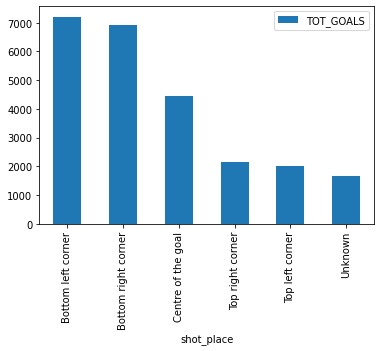

In [33]:
res1 = que1.toPandas()
plot1 = res1.plot.bar(x='shot_place', y='TOT_GOALS')

In [34]:
# Which countries have scored maximum no. of goals in all tournaments?

que2 = spark.sql("SELECT country, COUNT(1) AS TOT_GOALS FROM soccer WHERE is_goal = 1 GROUP BY country\
                    ORDER BY 2 DESC")
que2.show()

+-------+---------+
|country|TOT_GOALS|
+-------+---------+
|  spain|     5583|
|  italy|     5491|
| france|     5199|
|germany|     4621|
|england|     3552|
+-------+---------+



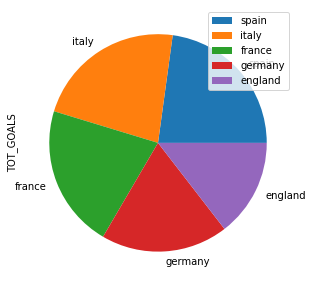

In [35]:
res2 = que2.toPandas()
plot2 = res2.plot.pie(y='TOT_GOALS', labels =res2.country, figsize=(5, 5))

In [36]:
# At what minutes most number of goals are scored?

que3 = spark.sql("SELECT time, count(1) as num_of_goals FROM soccer WHERE is_goal = 1 GROUP BY time ORDER BY 2 DESC LIMIT 15")
que3.show()

+----+------------+
|time|num_of_goals|
+----+------------+
|  90|        1244|
|  45|         594|
|  56|         339|
|  72|         308|
|  50|         307|
|  86|         306|
|  73|         306|
|  88|         305|
|  61|         304|
|  55|         300|
|  82|         298|
|  64|         296|
|  79|         294|
|  85|         293|
|  51|         293|
+----+------------+



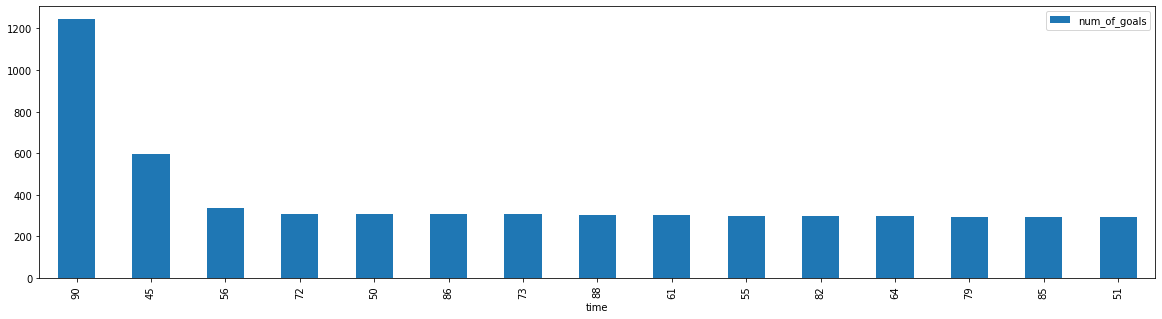

In [37]:
res3 = que3.toPandas()
plot3 = res3.plot.bar(x='time', y='num_of_goals', figsize=(20,5))

In [38]:
# At what minutes maximum number of yellow card were given?

que4 = spark.sql("SELECT time, count(1) as num_of_yellow_cards FROM soccer \
                WHERE event_type_str == 'Yellow card' OR event_type_str == 'Second yellow card' \
                GROUP BY time ORDER BY 2 DESC LIMIT 10")
que4.show()

+----+-------------------+
|time|num_of_yellow_cards|
+----+-------------------+
|  90|               2784|
|  45|               1106|
|  88|                686|
|  89|                650|
|  87|                624|
|  86|                618|
|  84|                593|
|  85|                592|
|  80|                588|
|  83|                585|
+----+-------------------+



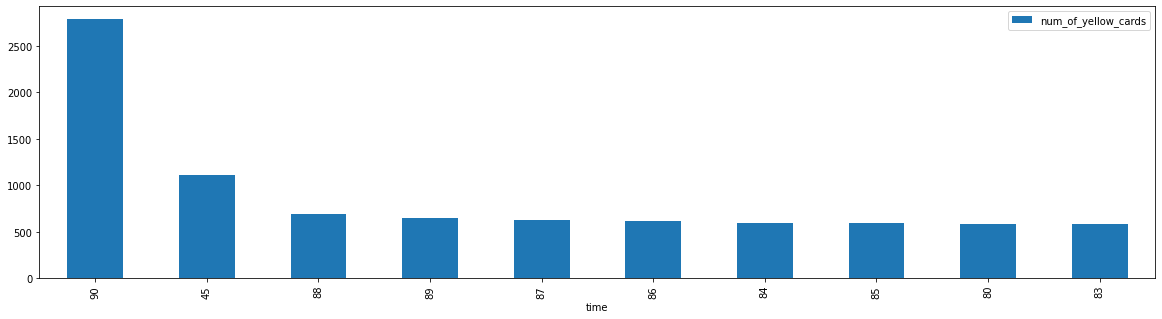

In [39]:
res4 = que4.toPandas()
plot4 = res4.plot.bar(x='time', y='num_of_yellow_cards', figsize=(20,5))

In [40]:
# Analyze time ranges when maximum red cards are given

que5_ = spark.sql("SELECT time_bin, count(1) as num_of_red_card FROM soccer \
                WHERE event_type_str == 'Red card' \
                GROUP BY time_bin ORDER BY 1")
que5_.show()

+--------+---------------+
|time_bin|num_of_red_card|
+--------+---------------+
|     0.0|             44|
|     1.0|             60|
|     2.0|             85|
|     3.0|             79|
|     4.0|             92|
|     5.0|             95|
|     6.0|            112|
|     7.0|            119|
|     8.0|            191|
|     9.0|            275|
+--------+---------------+



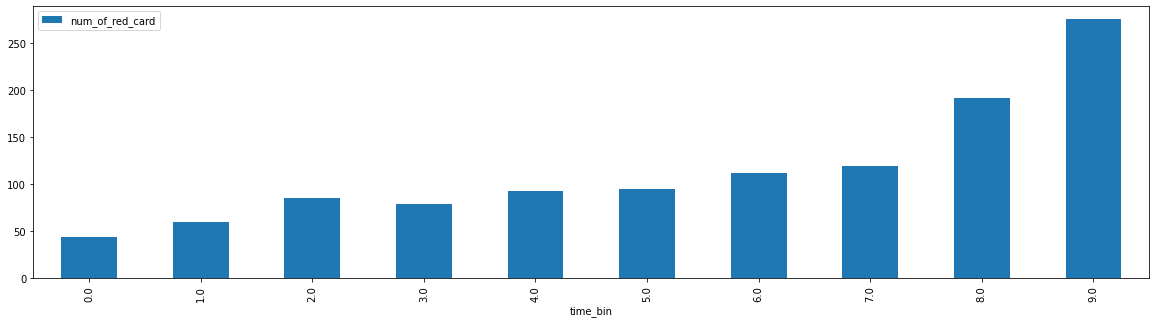

In [41]:
res5_ = que5_.toPandas()
plot5_ = res5_.plot.bar(x='time_bin', y='num_of_red_card', figsize=(20,5))

In [42]:
# Analyze time ranges when maximum substitutions are done

que6_ = spark.sql("SELECT TIME_BIN, count(1) as total_substitutions FROM soccer \
                WHERE event_type_str == 'Substitution' \
                GROUP BY TIME_BIN ORDER BY 1")                 
que6_.show()

+--------+-------------------+
|TIME_BIN|total_substitutions|
+--------+-------------------+
|     0.0|                283|
|     1.0|                441|
|     2.0|                638|
|     3.0|                730|
|     4.0|               4233|
|     5.0|               4720|
|     6.0|               9147|
|     7.0|              12858|
|     8.0|              12745|
|     9.0|               5943|
+--------+-------------------+



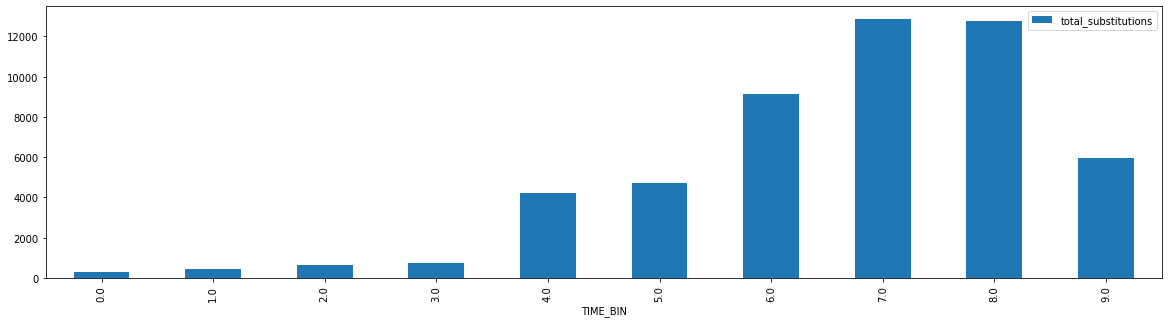

In [43]:
res6_ = que6_.toPandas()
plot6_ = res6_.plot.bar(x='TIME_BIN', y='total_substitutions', figsize=(20,5))

In [44]:
# Que 7. Goal wise distribution of Location and shot place for 'Spain'

que7 = spark.sql("SELECT shot_place, location, TOT_GOALS FROM ( \
                    SELECT shot_place, location, TOT_GOALS, \
                    RANK() OVER (PARTITION BY shot_place ORDER BY TOT_GOALS DESC) goals_rank \
                    FROM ( \
                          SELECT \
                          CASE WHEN shot_place_str = 'NA' THEN 'Unknown' ELSE shot_place_str END AS shot_place, \
                          CASE WHEN location_str = 'NA' THEN 'Unknown' ELSE location_str END AS location, \
                          COUNT(1) AS TOT_GOALS \
                          FROM soccer \
                          WHERE is_goal = 1 AND COUNTRY_CODE = 'ESP' \
                          GROUP BY shot_place_str, location_str \
                    ) tmp_in \
                    WHERE TOT_GOALS IS NOT NULL AND TOT_GOALS <> 0 \
                 ) tmp_out \
                WHERE goals_rank <= 3 AND location != 'Unknown' AND shot_place != 'Unknown' ORDER BY shot_place")
que7.show()

+-------------------+--------------------+---------+
|         shot_place|            location|TOT_GOALS|
+-------------------+--------------------+---------+
| Bottom left corner|    Very close range|      219|
| Bottom left corner|   Centre of the box|      832|
| Bottom left corner|     Outside the box|      166|
|Bottom right corner|    Very close range|      174|
|Bottom right corner|   Centre of the box|      813|
|Bottom right corner|     Outside the box|      163|
| Centre of the goal|        Penalty spot|       65|
| Centre of the goal|   Centre of the box|      429|
| Centre of the goal|    Very close range|      275|
|    Top left corner|     Outside the box|       63|
|    Top left corner|    Very close range|       56|
|    Top left corner|   Centre of the box|      172|
|   Top right corner|   Centre of the box|      178|
|   Top right corner|     Outside the box|       74|
|   Top right corner|Left side of the box|       48|
+-------------------+--------------------+----

In [45]:
# Goal distribution in different time bins for all countries

que8 = spark.sql("SELECT country, TIME_BIN, COUNT(1) TOT_GOALS \
                  FROM soccer \
                  WHERE is_goal = 1 \
                  GROUP BY country, TIME_BIN \
                  ORDER BY country, TIME_BIN")
que8.show()

+-------+--------+---------+
|country|TIME_BIN|TOT_GOALS|
+-------+--------+---------+
|england|     0.0|      289|
|england|     1.0|      364|
|england|     2.0|      326|
|england|     3.0|      358|
|england|     4.0|      422|
|england|     5.0|      353|
|england|     6.0|      338|
|england|     7.0|      356|
|england|     8.0|      354|
|england|     9.0|      392|
| france|     0.0|      455|
| france|     1.0|      490|
| france|     2.0|      455|
| france|     3.0|      535|
| france|     4.0|      567|
| france|     5.0|      504|
| france|     6.0|      465|
| france|     7.0|      562|
| france|     8.0|      535|
| france|     9.0|      631|
+-------+--------+---------+
only showing top 20 rows

